In [112]:
#Import Cell
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
#Read Data Cell
happiness2015 = pd.read_csv('World_Happiness_2015.csv')
happiness2016 = pd.read_csv('World_Happiness_2016.csv')
happiness2017 = pd.read_csv('World_Happiness_2017.csv')
world_dev = pd.read_csv("World_dev.csv")

# Updated data set for "working with missing and duplicated data"
happiness2015n = pd.read_csv('wh_2015.csv')
happiness2016n = pd.read_csv('wh_2016.csv')
happiness2017n = pd.read_csv('wh_2017.csv')

In [21]:
happiness2015['Year']= 2015
happiness2016['Year']= 2016
happiness2017['Year']= 2017

In [17]:
happiness2017.info()
happiness2016.info()
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
 12  Year                           155 non-null    int

In [37]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
concat_axis0 = pd.concat([head_2015,head_2016], axis = 0)
concat_axis1 = pd.concat([head_2015,head_2016], axis = 1)
question1 = concat_axis0.shape[0]
question2 = concat_axis1.shape[0]

In [38]:
head_2015 = happiness2015[['Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
concat_axis0 = pd.concat([head_2015,head_2016], axis = 0)
concat_axis1 = pd.concat([head_2015,head_2016], axis = 1)
question1 = concat_axis0.shape[0]
question2 = concat_axis1.shape[0]

In [47]:
three_2015=happiness2015[['Country','Happiness Rank', 'Year']].iloc[2:5]
three_2016=happiness2016[['Country','Happiness Rank', 'Year']].iloc[2:5]
print(three_2015)
print(three_2016)

   Country  Happiness Rank  Year
2  Denmark               3  2015
3   Norway               4  2015
4   Canada               5  2015
   Country  Happiness Rank  Year
2  Iceland               3  2016
3   Norway               4  2016
4  Finland               5  2016


In [50]:
merged_left = pd.merge(left=three_2015, right=three_2016, on='Country', how='left')
merged_left_updated = pd.merge(left=three_2016, right=three_2015, on='Country', how='left')
print(merged_left_updated)

   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Iceland                 3    2016               NaN     NaN
1   Norway                 4    2016               4.0  2015.0
2  Finland                 5    2016               NaN     NaN


# Transforming Data With Pandas

In [51]:
hapiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [52]:
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }

In [57]:
happiness2015 = happiness2015.copy().rename(mapping, axis=1)

In [55]:
happiness20151.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [56]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

In [59]:
economy_impact_map = happiness2015['Economy'].map(label)
economy_impact_apply = happiness2015['Economy'].apply(label)
economy_impact_map.equals(economy_impact_apply)

True

In [68]:
happiness2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015


In [64]:
pattern = r"income[:'']"
income_group = income_group.str.replace(pattern,'',regex=True)

In [71]:
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
merged = pd.merge(left=happiness2015, right=world_dev, how='left', left_on='Country', right_on='ShortName')
merged = merged.rename(col_renaming, axis=1)  

In [ ]:
income_group = merged['IncomeGroup'].copy()

In [82]:
pattern = r"income[:'']"
income_group = income_group.str.replace(pattern,'',regex=True).str.replace('income','').str.strip().str.upper()

In [85]:
pv_incomes = pd.pivot_table(merged, index='IncomeGroup',values='Happiness Score')

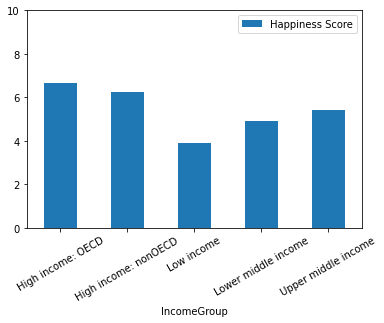

In [90]:
pv_incomes.plot(kind='bar', rot = 30, ylim=(0,10))
plt.show()

# Missing and Duplicate Data

In [95]:
print(happiness2015n.shape)
print(happiness2016n.shape)
print(happiness2017n.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        164 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    float64
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Year                           164 non-null    int

In [98]:
missing_2015 = happiness2015n.isnull().sum()
missing_2016 = happiness2016n.isnull().sum()
missing_2017 = happiness2017n.isnull().sum()

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

In [100]:
happiness2017n.columns = happiness2017n.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()

In [106]:
happiness2016n.columns = happiness2016n.columns.str.replace('(','').str.replace(')','').str.replace('  ',' ').str.upper()
happiness2015n.columns = happiness2015n.columns.str.replace('(','').str.replace(')','').str.replace('  ',' ').str.upper()
happiness2015n.head()
happiness2016n.head()

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4.0,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5.0,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [107]:
combined = pd.concat([happiness2015n, happiness2016n, happiness2017n],ignore_index = True)

In [110]:
combined[combined['YEAR']==2015].shape

(164, 17)

In [111]:
combined.isnull().sum()

COUNTRY                          0
REGION                         177
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
STANDARD ERROR                 334
ECONOMY GDP PER CAPITA          22
FAMILY                          22
HEALTH LIFE EXPECTANCY          22
FREEDOM                         22
TRUST GOVERNMENT CORRUPTION     22
GENEROSITY                      22
DYSTOPIA RESIDUAL               22
YEAR                             0
LOWER CONFIDENCE INTERVAL      335
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
dtype: int64

**Heat Map** 

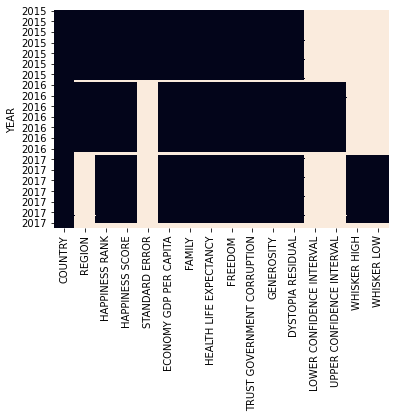

In [115]:
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)
plt.show()

In [121]:
regions_2017 = combined[combined['YEAR']==2017]['REGION']
missing = regions_2017.isnull().sum()


164

In [126]:
happiness2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [130]:
dups = combined.duplicated(['REGION','COUNTRY'])
combined[dups]

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW
164,Denmark,Western Europe,1.0,7.526,NaN,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016,7.460,7.592,NaN,NaN
165,Switzerland,Western Europe,2.0,7.509,NaN,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016,7.428,7.590,NaN,NaN
166,Iceland,Western Europe,3.0,7.501,NaN,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,7.333,7.669,NaN,NaN
167,Norway,Western Europe,4.0,7.498,NaN,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016,7.421,7.575,NaN,NaN
168,Finland,Western Europe,5.0,7.413,NaN,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016,7.351,7.475,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,Oman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
487,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
488,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
489,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
